# Neural Network Regression


  - Architecture of a regression model
  - Input shapes and output shapes
      - `X`: features/data (inputs)
      - `y`: labels (outputs)
  - Creating custom data to view and fit
  - Steps in modelling
      - Creating a model
      - Compiling a model
          - Defining a loss function
          - Setting up an optimizer
          - Creating evaluation metrics
      - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
      - Visualizng the model ("visualize, visualize, visualize")
      - Looking at training curves
      - Compare predictions to ground truth (using our evaluation metrics)
  - Saving a model (so we can use it later)
  - Loading a model


In [1]:
import tensorflow as tf
tf.__version__

'2.9.2'

# Creating data

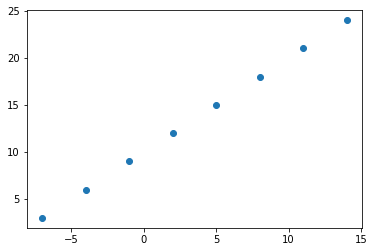

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.show()

# Regression input shapes and output shapes

In [ ]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

  - **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) API) or import a previously built model (known as transfer learning).
  - **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
  - **Fitting a model** - letting the model try to find patterns in the data (how does `X `get to `y`).  

**Note**: If you're using `TensorFlow 2.7.0**+**`, the `fit()` function no longer upscales input data to go from `(batch_size, ) to (batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.

In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.



In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 857ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict([17.0])[0][0]
y_pred

1/1 [==============================] - 0s 28ms/step


12.716021

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.



1.   **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2.   **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3.  **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile model (same as above)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.optimizers.SGD(),
    metrics=["mae"]
)
# Fit model (this time we'll train for longer) from 5 to 100
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 469ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 8

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0])[0][0] # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 48ms/step


30.158512



Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?


In [ ]:
# Improving model by adding one hidden layer

# set random seed
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile model (same as above)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.optimizers.SGD(),
    metrics=["mae"]
)
# Fit model (this time we'll train for longer) from 5 to 100
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 638ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 16ms/s

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0])[0][0] # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 58ms/step


31.382648

Overfitting, should separate train and test sets

In [ ]:
# Improving model by adding one hidden layer,
# changing the optimizer and adding a lr

# set random seed
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile model (same as above)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.optimizers.Adam(lr=.01),
    metrics=["mae"]
)
# Fit model (this time we'll train for longer) from 5 to 100
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 822ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 4.1246

In [ ]:
model.predict([17.0])[0][0]

1/1 [==============================] - 0s 66ms/step


26.206875

# Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Make a bigger dataset

In [3]:
X, y = np.arange(-100, 100, 4), np.arange(-90, 110, 4)

In [ ]:
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Splitting the data

In [ ]:
# Check how many samples we have
len(X)

50

In [4]:
# Split data into train and test sets
# train:test 80%:20%

X_train , y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing the data

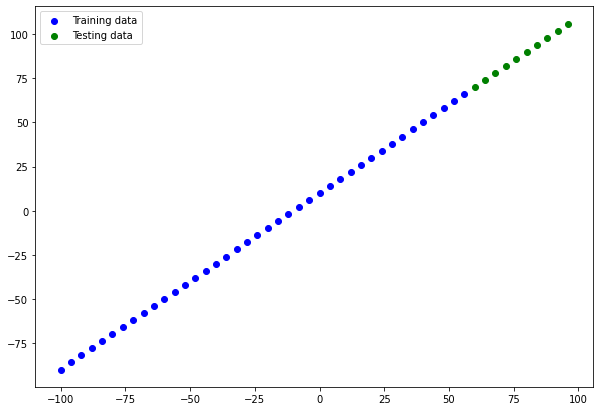

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [ ]:
model.summary()

ValueError: ignored

In [5]:
# Model which builds automaticaly by defining
# the input_shape argument
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, y_train, epochs=100, verbose=0)

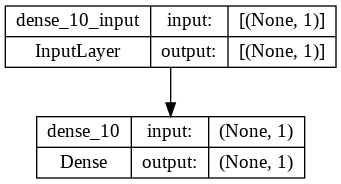

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# Visualizing the predictions

In [7]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 85ms/step


In [8]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [9]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

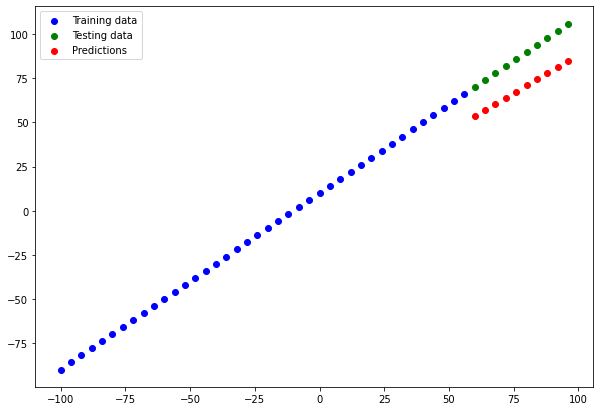

In [10]:
plot_predictions()

# Evaluating predictions

In [11]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 287ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [14]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [15]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [18]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [17]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds)).numpy()

18.745327

In [19]:
# Calculate the MSE
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds)).numpy()

353.57336

Let's make functions for the evaluation metrics.

In [20]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

# Running experiments to improve a model


  1. model_1 - same as original model, 1 layer, trained for 100 epochs.
  2. model_2 - 2 layers, trained for 100 epochs.
  3. model_3 - 2 layers, trained for 500 epochs.


**model_1**

In [24]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 88ms/step


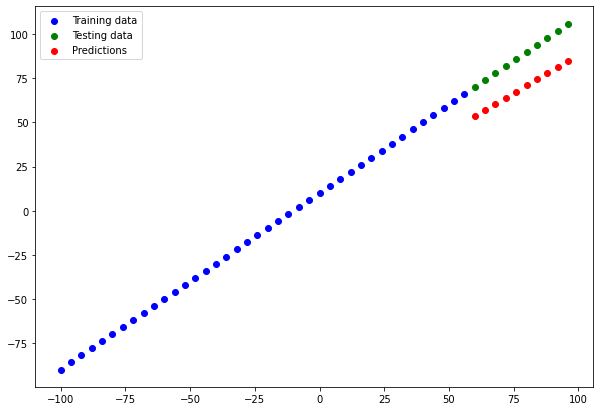

In [25]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [26]:
# Calculate model_1 metrics
mae_1 = mae(y_test, tf.squeeze(y_pred_1)).numpy()
mse_1 = mse(y_test, tf.squeeze(y_pred_1)).numpy()

mae_1, mse_1

(18.745327, 353.57336)

**model_2**
This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [27]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 13ms

1/1 [==============================] - 0s 91ms/step


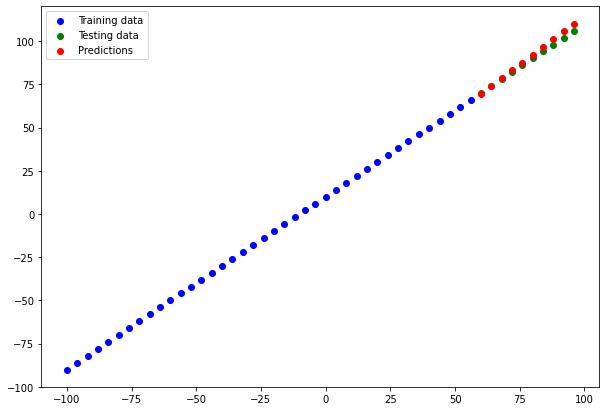

In [28]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [29]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_pred_2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

**model_3**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.


In [30]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 9m

1/1 [==============================] - 0s 92ms/step


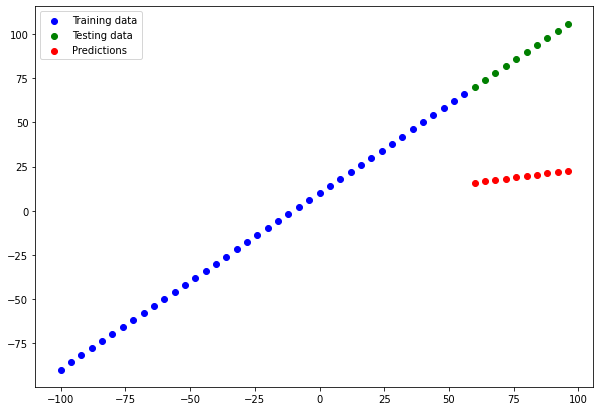

In [31]:
# Make and plot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [32]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test, y_pred_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

# Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.


In [33]:
import pandas as pd

model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


# A larger example

In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [72]:
fp = (
    "https://raw.githubusercontent.com/stedy/Machine-Learning"
    "-with-R-datasets/master/insurance.csv"
)

df = pd.read_csv(fp)
df.sample(8)

,age,sex,bmi,children,smoker,region,charges
78,22,female,39.805,0,no,northeast,2755.02095
254,50,male,31.825,0,yes,northeast,41097.16175
1083,32,male,31.500,1,no,southwest,4076.49700
257,38,female,40.150,0,no,southeast,5400.98050
1251,19,male,19.800,0,no,southwest,1241.56500
164,37,male,29.640,0,no,northwest,5028.14660
194,18,male,34.430,0,no,southeast,1137.46970
580,59,male,25.460,1,no,northeast,12913.99240


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
numerical = ['age', 'bmi', 'children', ]
categorical = ['sex', 'smoker', 'region']

data, target = df.drop(columns=['charges']), df.charges

In [74]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data,
    target,
    test_size=.2,
    random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

In [75]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

X_train_ohe = encoder.fit_transform(X_train[categorical])
X_test_ohe = encoder.transform(X_test[categorical])

In [53]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,0.608696,female,0.107345,0.4,no,northwest
1285,0.630435,female,0.224913,0.0,no,northeast
1142,0.739130,female,0.239440,0.0,no,southeast
969,0.456522,female,0.493947,1.0,no,southeast
486,0.782609,female,0.148238,0.6,no,northwest


In [76]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names_out())
X_train_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [77]:
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names_out())

In [79]:
X_train = np.column_stack([X_train[numerical], X_train_ohe])
X_train = pd.DataFrame(X_train, columns=numerical+list(encoder.get_feature_names_out()))

X_test = np.column_stack([X_test[numerical], X_test_ohe])
X_test = pd.DataFrame(X_test, columns=numerical+list(encoder.get_feature_names_out()))

In [80]:
X_train = X_train.drop(columns=['sex_male'])
X_test = X_test.drop(columns=['sex_male'])

In [81]:
X_train.head()

,age,bmi,children,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [82]:
X_test.head()

,age,bmi,children,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.586957,0.247915,0.4,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.378262,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.293920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,0.263250,0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021739,0.429379,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
